# 資料視覺化

## 郭耀仁

## Pandas 與資料視覺化

## 建構於 matplotlib

- 高階的繪圖函數
- 可以使用 seaborn 主題

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## 載入一個資料框

- 再次使用 `gapminder` 資料集

In [2]:
import pandas as pd

csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Pandas 繪圖功能

- `plot.scatter(x = , y = )` 散佈圖
- `plot.line()` 線圖
- `plot.hist(bins = )` 直方圖
- `plot.box()` 盒鬚圖
- `plot.bar()` 長條圖

## 散佈圖

- 檢視兩個連續變數的關係
- 2007 年所有國家的人均 GDP （gdpPercap）與預期壽命（lifeExp）

In [4]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]
gapminder_2007.plot.scatter(x = "gdpPercap", y = "lifeExp")

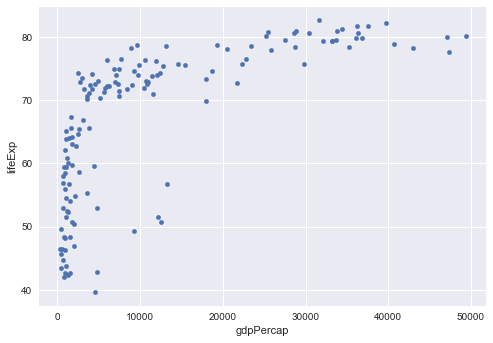

In [5]:
plt.show()

## 線圖

- 檢視時間與數值的關係
- 中國、台灣、日本與南韓的人均 GDP 變化趨勢

In [6]:
# 轉換為 wide-format: pd.pivot_table()
na_countries = gapminder[gapminder['country'].isin(["China", "Taiwan", "Japan", "Korea, Rep."])]
na_countries_wide = pd.pivot_table(na_countries, values = 'gdpPercap', columns = 'country', index = 'year')
na_countries_wide

country,China,Japan,"Korea, Rep.",Taiwan
year,,,,
1952,400.448611,3216.956347,1030.592226,1206.947913
1957,575.987001,4317.694365,1487.593537,1507.861290
1962,487.674018,6576.649461,1536.344387,1822.879028
1967,612.705693,9847.788607,2029.228142,2643.858681
1972,676.900092,14778.786360,3030.876650,4062.523897
1977,741.237470,16610.377010,4657.221020,5596.519826
1982,962.421380,19384.105710,5622.942464,7426.354774
1987,1378.904018,22375.941890,8533.088805,11054.561750
1992,1655.784158,26824.895110,12104.278720,15215.657900


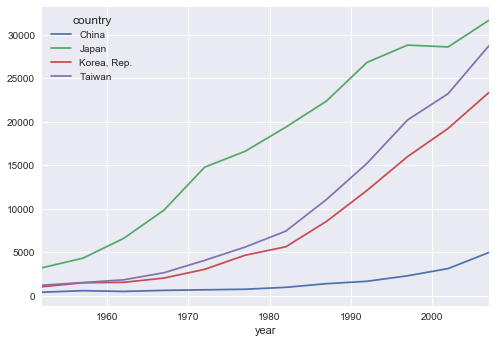

In [7]:
na_countries_wide.plot.line()
plt.show()

## 直方圖

- 檢視數值的散佈
- 2007 年國家的人均 GDP 分佈

In [8]:
gapminder_2007['gdpPercap'].plot.hist(bins = 30)

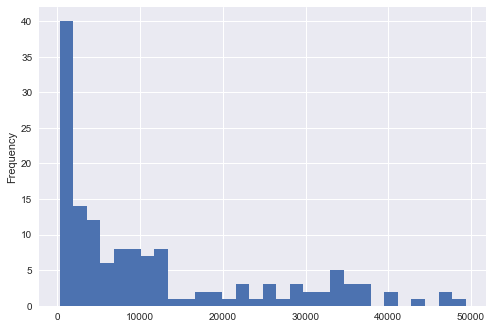

In [9]:
plt.show()

## 盒鬚圖

- 檢視數值依據類別變數的散佈
- 2007 年各洲的人均 GDP 分佈

In [10]:
gapminder_2007_cont_pivot = gapminder_2007.pivot_table(values = 'gdpPercap', columns = 'continent', index = 'country')
gapminder_2007_cont_pivot.plot.box()

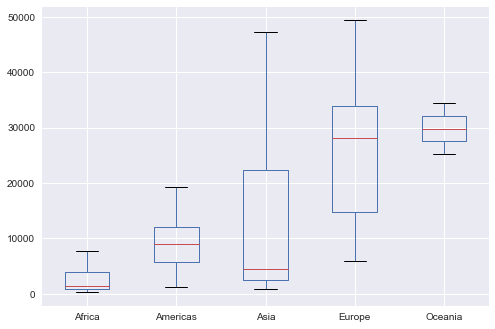

In [11]:
plt.show()

## 長條圖

- 檢視不同類別變數的數值排名
- 2007 年各洲的人口總數

In [12]:
summarized_pop_2007 = gapminder_2007.groupby(by = 'continent')['pop'].sum()
summarized_pop_2007.plot(kind = 'bar', rot = 0)

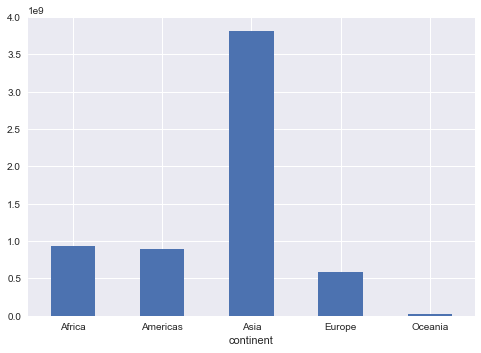

In [13]:
plt.show()